# Text classification with neural networks via ```scikit-learn```

## Import packages


In [1]:
# system tools
import os
import sys

# data munging tools
import pandas as pd

# Machine learning stuff
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Visualisation
import matplotlib.pyplot as plt

## Reading in the data

Our data is already in a tabular format, so we're going to load it using ```pandas```

In [3]:
# load the data to pandas csv
filename = os.path.join("..", "Data", "fake_or_real_news.csv")

data = pd.read_csv(filename, index_col=0)

In [6]:
data.sample(10)

,title,text,label
1042,The big question about Hillary Clinton: What i...,What if Hillary Clinton is in legal hot water ...,REAL
1003,Ted Cruz: Now the odds-on favorite,"With 16 primaries and caucuses remaining, Dona...",REAL
7706,Emma Watson Urges US Women to Consider Gender ...,Getty - Timothy A. Clary \nBritish actress Emm...,FAKE
542,Fact Check: Did Hillary Clinton Introduce A Ne...,Fact Check: Did Hillary Clinton Introduce A Ne...,REAL
171,Checking a claim that 'nobody did anything wro...,"As part of a partnership with Factcheck.org, a...",REAL
3715,Black faith is under attack: How to make sense...,"When I woke up on Thursday morning, the world ...",REAL
3073,Booze Brands Polarize Just Like Politicians,A gay man is selling beer during the NBA playo...,REAL
593,Gun control becomes a litmus test in Democrati...,The move would make it easier for the Trump ad...,REAL
4731,Mike Pence enabled Donald Trump. Stop saying h...,"Implausible schemes to put Mike Pence, rather ...",REAL
4363,Is US now a climate change leader? How Obama's...,The climate change plan announced by the Obama...,REAL


In [7]:
# create data variables containing data and labels
X = data["text"]
y = data["label"]

## Train-test split

Looking back at the code from last week, use the ```train_test_split()``` function to create an 80/20 split in the data.

In [8]:
# add your train/test split code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

## Vectorizing and Feature Extraction

__Create vectorizer object__

Next, you want to create a vectorizer object. I suggest the following parameters:

- TfidfVectorizer on unigrams and bigrams;
- make everything lowercase; 
- remove top and bottom 5% of words; 
- keep the top 500 features.

In [9]:
# add your vectorizer code here
vectorizer = TfidfVectorizer(ngram_range = (1,2),
                            lowercase = True,
                            max_df = 0.95,
                            min_df = 0.05,
                            max_features = 100)

This vectorizer is then used to turn all of our documents into a vector of numbers, instead of text.

In [11]:
# fit the vectorizer to the data
X_train_feats = vectorizer.fit_transform(X_train)

X_test_feats = vectorizer.transform(X_test)

feature_names = vectorizer.get_feature_names_out()

## Classifying and predicting

We now have to 'fit' the classifier to our data. This means that the classifier takes our data and finds correlations between features and labels.

These correlations are then the *model* that the classifier learns about our data. This model can then be used to predict the label for new, unseen data.

__Simple neural network__

We can define simple NN classifiers using the ```MLPClassifier``` class in ```scikit-learn```. I've done that for you here - can you see how it's been put together?

For more information, check out the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

In [14]:
# fit the classifier to the data
classifier = MLPClassifier(activation = "logistic",
                           hidden_layer_sizes = (20,),
                           max_iter=1000,
                           random_state = 42).fit(X_train_feats, y_train)

__Get predictions__

We want to use our trained model to get predicted labels on our test data.

In [16]:
# get predictions

y_pred = classifier.predict(X_test_feats)

print(y_pred[:20])

['FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'FAKE' 'REAL' 'REAL'
 'FAKE' 'REAL' 'REAL' 'FAKE' 'REAL' 'REAL' 'FAKE' 'REAL' 'REAL' 'REAL']


## Evaluate

We can also do some quick calculations, in order to assess just how well our model performs.

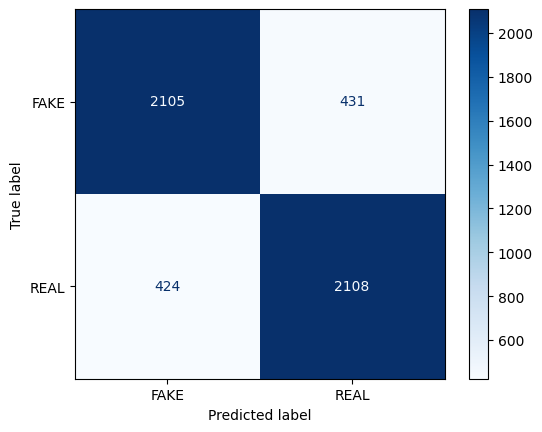

In [19]:
# use confusion matrix to check performance
metrics.ConfusionMatrixDisplay.from_estimator(classifier, X_train_feats,
                                            y_train,
                                            cmap = plt.cm.Blues,
                                            labels = ["FAKE", "REAL"])

__Calculating metrics__

We can use the same built-in classification report from ```scikit-learn``` to get the classification report for our model.

In [21]:
# get classification report
classifier_metrics = metrics.classification_report(y_test, y_pred)
print(classifier_metrics)

              precision    recall  f1-score   support

        FAKE       0.84      0.82      0.83       628
        REAL       0.83      0.85      0.84       639

    accuracy                           0.84      1267
   macro avg       0.84      0.83      0.83      1267
weighted avg       0.84      0.84      0.84      1267



__Plotting loss curves__

If our model is learning well, we should see a smooth, steep downwards slope which tapers off towards a plateau. 

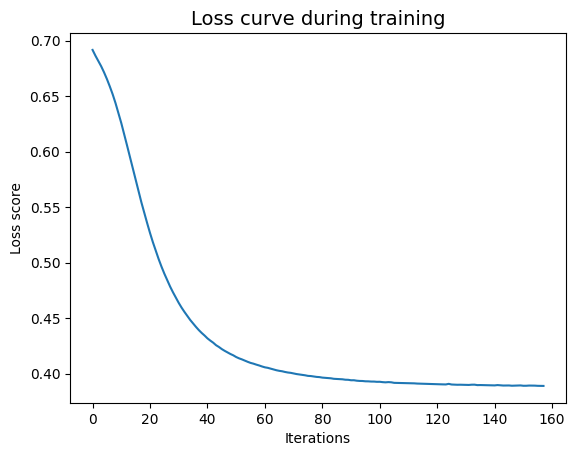

In [22]:
plt.plot(classifier.loss_curve_)
plt.title("Loss curve during training", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss score')
plt.show()

## Save models

As last week, it's possible to save an ```MLPClassifier``` model for later use using the library ```joblib```.

In [23]:
from joblib import dump, load
dump(classifier, "MLP_classifier.joblib")
dump(vectorizer, "tfidf_vectorizer.joblib")

['tfidf_vectorizer.joblib']

We can restart the kernel for our notebook to see how that works:

In [24]:
from joblib import dump, load
loaded_clf = load("MLP_classifier.joblib")
loaded_vect = load("tfidf_vectorizer.joblib")

In [27]:
sentence = "Hillary Clinton is a crook who eats babies!"

Notice that we pass a ```list``` of ```str```, even if we only have one:

In [28]:
test_sentence = loaded_vect.transform([sentence])
loaded_clf.predict(test_sentence)

array(['FAKE'], dtype='<U4')